In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("shootings_2022.csv")

In [3]:
df.head()

,Date,State,Dead,Injured,Total,Description
0,03-03-2022,Nevada,1,6,7,A dispute between neighbors led to a shooting ...
1,02-03-2022,Maryland,1,3,4,Four men were shot in the Walbrook neighborhoo...
2,28-02-2022,California,5,0,5,"A man fatally shot himself, his three children..."
3,27-02-2022,California,0,4,4,An argument between two groups of people at a ...
4,27-02-2022,Louisiana,0,4,4,An argument at a business in the southeast par...


In [4]:
df.shape

(81, 6)

In [5]:
df.tail()

,Date,State,Dead,Injured,Total,Description
76,01-01-2022,Georgia,1,3,4,After officers were dispatched to respond to a...
77,01-01-2022,Wisconsin,1,3,4,A man was killed and three others wounded in a...
78,01-01-2022,Indiana,0,4,4,Four people were wounded at a New Years party ...
79,01-01-2022,Colorado,2,2,4,Two adults were killed and two wounded in an e...
80,01-01-2022,Missouri,0,4,4,Four adults were wounded in the early morning ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         81 non-null     object
 1   State        81 non-null     object
 2   Dead         81 non-null     int64 
 3   Injured      81 non-null     int64 
 4   Total        81 non-null     int64 
 5   Description  81 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.9+ KB


In [7]:
df.describe()

,Dead,Injured,Total
count,81.000000,81.000000,81.000000
mean,1.135802,3.802469,4.938272
std,1.339338,2.288120,2.063648
min,0.000000,0.000000,4.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,4.000000,5.000000
max,6.000000,14.000000,16.000000


In [8]:
df.isnull().sum()

Date           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [9]:
total_victims = df['Total'].sum()
print(total_victims)

400


In [10]:
victims_state = df.groupby('State').sum()
victims_state.sort_values(by = 'Total',ascending = False)

,Dead,Injured,Total
State,,,
California,15,38,53
Texas,15,22,37
Georgia,9,25,34
Missouri,5,23,28
Louisiana,2,20,22
Wisconsin,8,13,21
Nevada,2,19,21
Florida,3,15,18
Illinois,3,15,18


In [11]:
victims_state.sort_values(by='Total' ,ascending=False).head()

,Dead,Injured,Total
State,,,
California,15,38,53
Texas,15,22,37
Georgia,9,25,34
Missouri,5,23,28
Louisiana,2,20,22


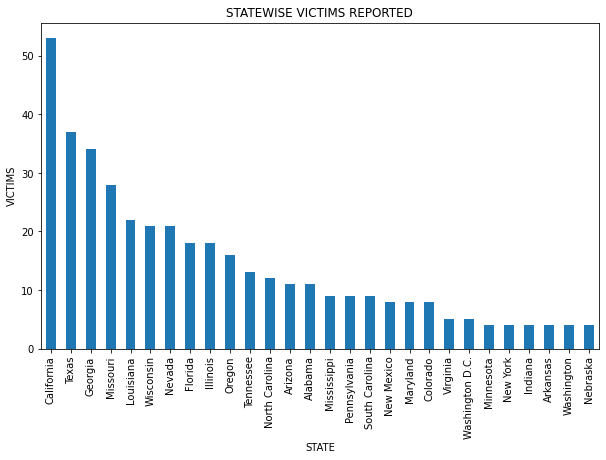

State
California         53
Texas              37
Georgia            34
Missouri           28
Louisiana          22
Wisconsin          21
Nevada             21
Florida            18
Illinois           18
Oregon             16
Tennessee          13
North Carolina     12
Arizona            11
Alabama            11
Mississippi         9
Pennsylvania        9
South Carolina      9
New Mexico          8
Maryland            8
Colorado            8
Virginia            5
Washington D.C.     5
Minnesota           4
New York            4
Indiana             4
Arkansas            4
Washington          4
Nebraska            4
Name: Total, dtype: int64


In [12]:
plt.subplots(figsize = (10,6))
cr = victims_state['Total'].sort_values(ascending = False)
ax = cr.plot.bar()
ax.set_xlabel('STATE')
ax.set_ylabel('VICTIMS')
ax.set_title('STATEWISE VICTIMS REPORTED')
plt.show()
print(cr)

In [13]:
california_victims = df[df['State']=='California']

In [14]:
california_victims.head()

,Date,State,Dead,Injured,Total,Description
2,28-02-2022,California,5,0,5,"A man fatally shot himself, his three children..."
3,27-02-2022,California,0,4,4,An argument between two groups of people at a ...
21,19-02-2022,California,0,7,7,A man shot seven people outside a bar in the e...
28,12-02-2022,California,0,4,4,Outside an Italian restaurant hosting a party ...
33,06-02-2022,California,2,2,4,A chance encounter between two rival gangs at ...


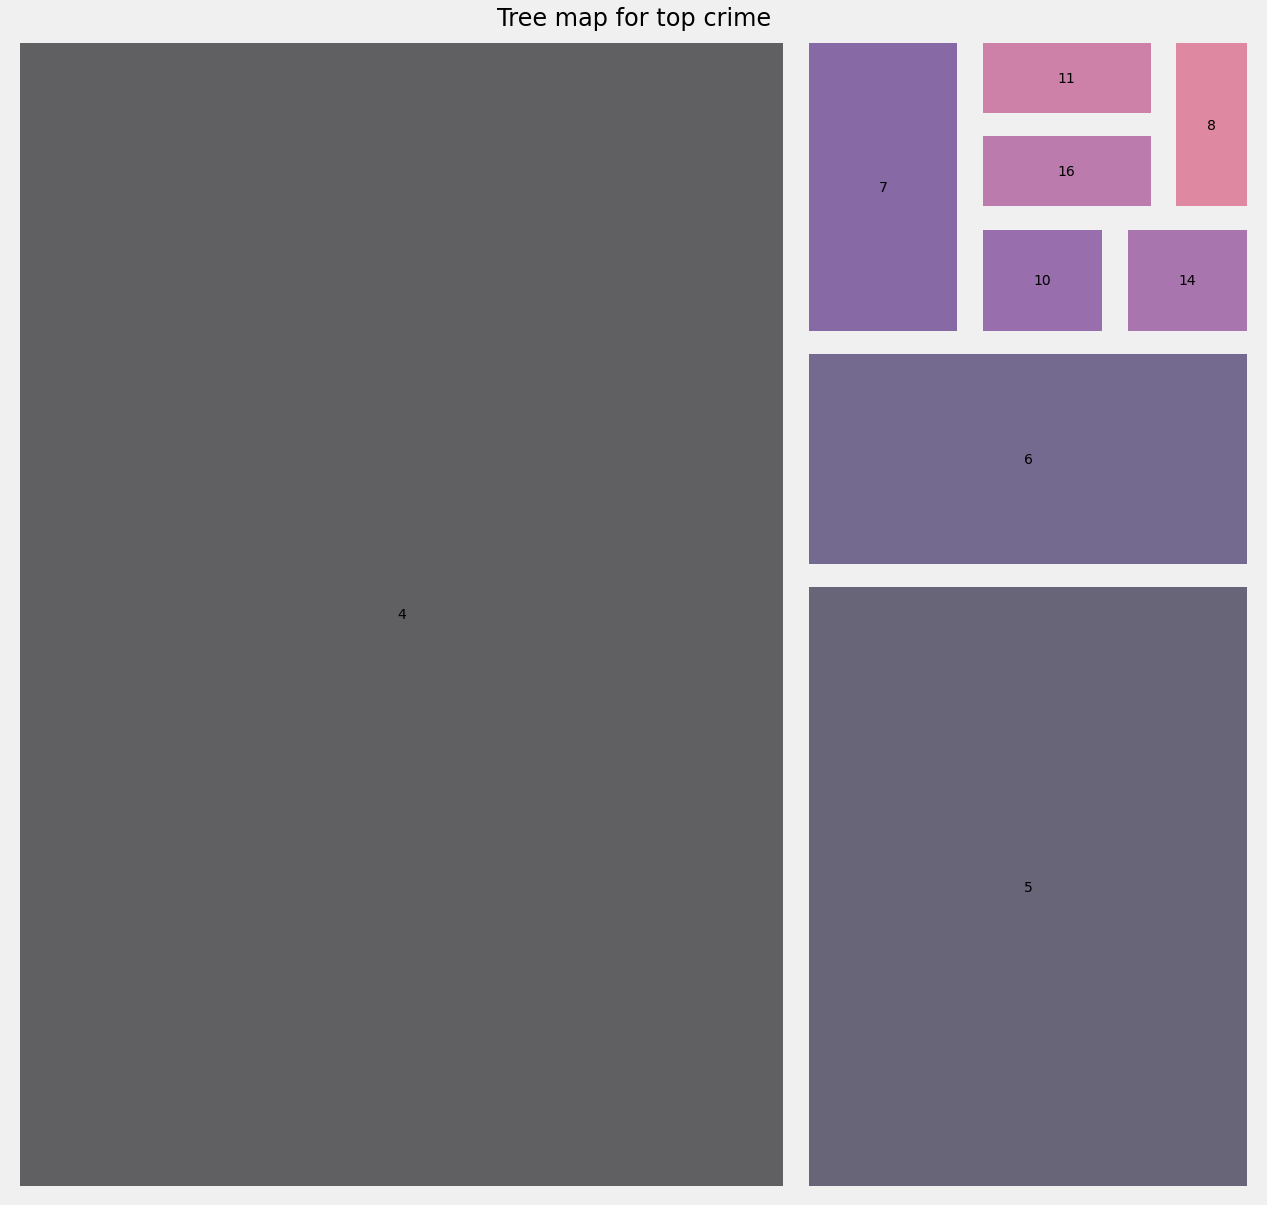

In [15]:
import squarify

y= df['Total'].value_counts().head(10)
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0,1,15))
squarify.plot(sizes=y.values,label=y.index,alpha=.6,color=color,pad=True)
plt.title('Tree map for top crime', fontsize=24)
plt.axis('off')
plt.show()

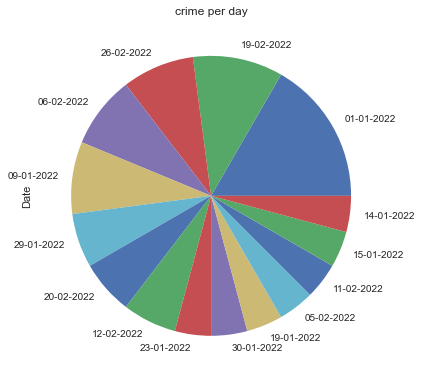

In [16]:
plt.style.use('seaborn')
df['Date'].value_counts().head(15).plot.pie(figsize = (15,6))
plt.title('crime per day')
plt.show()

<AxesSubplot:xlabel='Total', ylabel='State'>

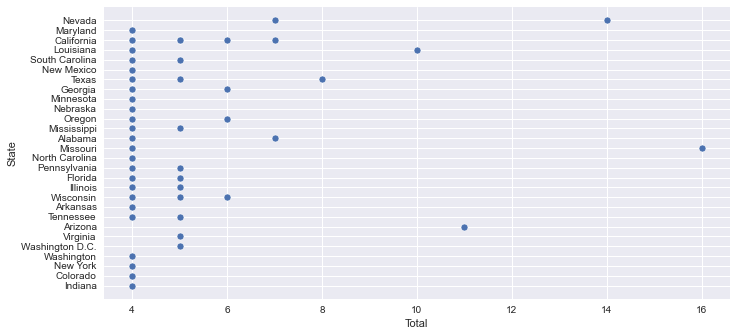

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Total",y="State",data=df)


In [18]:
x = df.drop(['Date','State','Description'], axis = 1)
y = df['Total']

In [19]:
x.shape

(81, 3)

In [20]:
y.shape

(81,)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.5)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [30]:
print('training',model.score(X_train,y_train))
print('test',model.score(X_test,y_test))

training 1.0
test 1.0
